<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/extras/images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка библиотек

In [ ]:
!pip install diffusers transformers torch

**Инпейтинг** - это "врисовка" в изображением с помощью масок

Исходное изображение

In [ ]:
!wget "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png" -O 'image.png'

Маска для врисовки

In [ ]:
!wget "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png" -O 'mask.png'

**Пайплайн** - заранее прописанный алгоритм

In [ ]:
from diffusers import StableDiffusionInpaintPipeline # пайплайн для инпеинта
from PIL import Image # библиотека для загрузки изображений

# загружаем пайплайн
inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting")
inpaint_pipe = inpaint_pipe.to("cuda")  # перекидываем модель на GPU

# открываем изображение и маску
image = Image.open("image.png")
mask = Image.open("mask.png")

# врисовка -> сохраняем результат в файл
result = inpaint_pipe(prompt="A beautiful landscape", image=image, mask_image=mask).images[0]
result.save("inpaint_result.png")

Исходное изображение

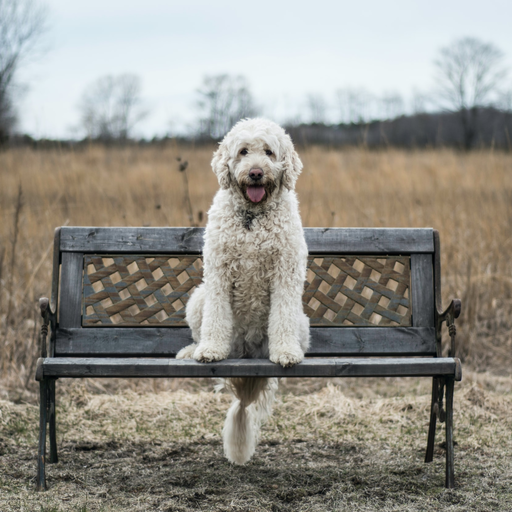

In [10]:
image

Маска

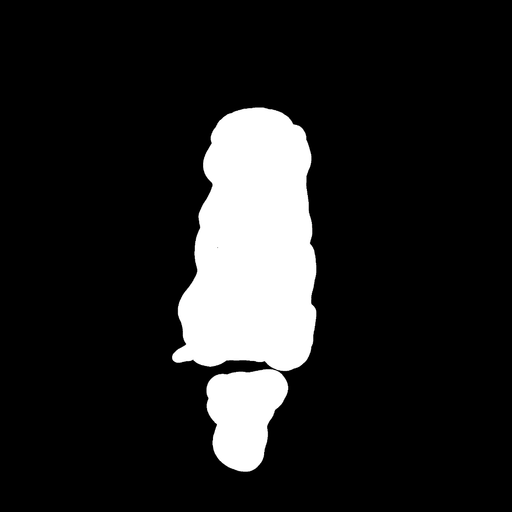

In [11]:
mask

Результат генерации по промпту `A beautiful landscape`

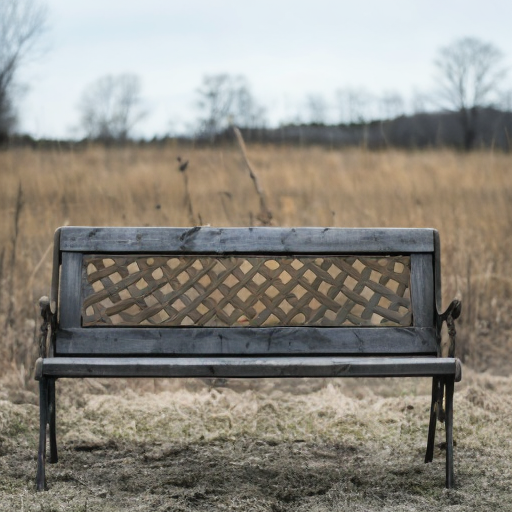

In [9]:
result

**Image2Image** - мы подгружаем изображение и промпт, чтобы получить новое изображение; получается своего рода фильтр

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline

# пайплайн
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
img2img_pipe = img2img_pipe.to("cuda")

# загрузим результат нашего инпеинта
image = Image.open("inpaint_result.png").convert("RGB")

# генерация по промпту и изображению
result = img2img_pipe(prompt="A futuristic city at sunset", image=image, strength=0.75, guidance_scale=7.5).images[0]
result.save("img2img_result.png")

Результат: наше изображение после инпеинта + промпт `A futuristic city at sunset`

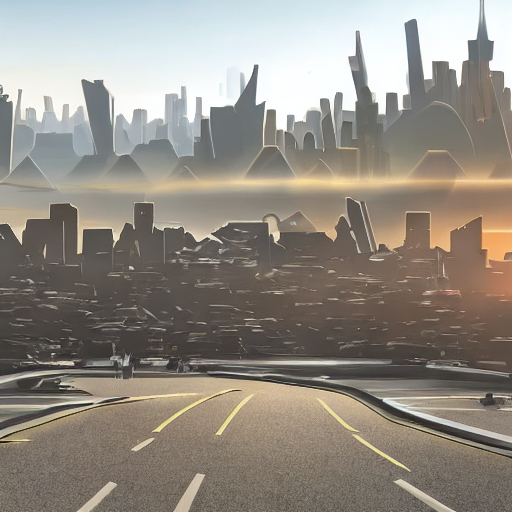

In [14]:
result

**Text2Image** - это просто генерация изображения по тексту

In [ ]:
from diffusers import StableDiffusionPipeline

# пайплайн
txt2img_pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
txt2img_pipe = txt2img_pipe.to("cuda")

# в качестве входных данных достаточно подать текстовый промпт
result = txt2img_pipe(prompt="A fantasy world with dragons and castles", guidance_scale=7.5).images[0]
result.save("text2image_result.png")

Результат по промпту `A fantasy world with dragons and castles`

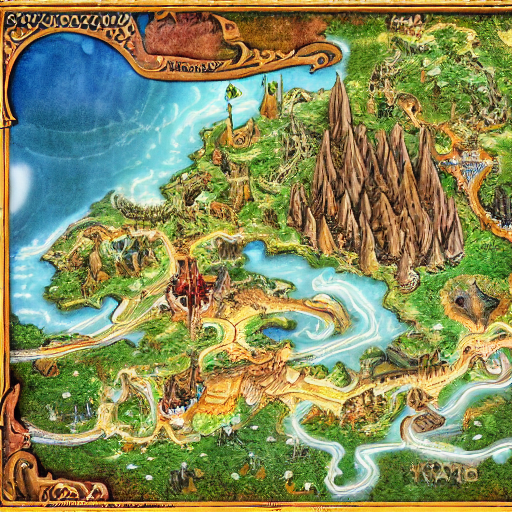

In [3]:
result